In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib, os

In [4]:
df = pd.read_csv(r"D:\hackerthon_ai_project\Data\stores_sales_forecasting.csv", encoding="latin1")

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2121, 21)


In [6]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [7]:
 # Preprocessing


In [ ]:
# Convert to datetime

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

In [11]:
# Check missing values

In [12]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Fill missing sales with rolling mean

In [15]:
df['Sales'] = df['Sales'].fillna(df['Sales'].rolling(7, min_periods=1).mean())

In [36]:
# observation:- 
# rolling mean (7 days) calculates the average of the last 7 values, and here we used it to fill missing sales values smoothly instead of leaving gaps
# Missing sales values were replaced with the average of the previous 7 days.
# This makes the sales trend smoother and more realistic, avoiding sudden jumps or drops due to missing data.
# Helps the forecasting model learn better seasonal/daily patterns

In [16]:
### Feature Engineering (Lag Features)

In [18]:
df['lag_1'] = df['Sales'].shift(1).fillna(0)
df['lag_7'] = df['Sales'].shift(7).fillna(0)
df['rolling_mean_7'] = df['Sales'].rolling(window=7, min_periods=1).mean()

In [37]:
# Observations
# Lag_1 (Previous Day Sales)
# This feature captures the sales value of the immediately previous day.
# Useful because sales on one day are often influenced by the previous day’s trend.

# Lag_7 (Last Week’s Sales)
# This feature uses the sales value from exactly one week before.
# Helps the model learn weekly seasonality patterns (e.g., weekends, holidays).

# Rolling_Mean_7 (7-Day Average Sales)
# This represents the average of the past 7 days’ sales.
# It smooths short-term fluctuations and shows the overall weekly trend

In [21]:
# Features and Target
features = ['lag_1', 'lag_7', 'rolling_mean_7']
X = df[features]
y = df['Sales']

In [ ]:
 ### Train-Test Split

In [22]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [38]:
# observation
# We split the dataset into 80% training and 20% testing using train_size = int(len(df) * 0.8).
# The int() ensures the split index is a whole number since row indices cannot be fractions.
# In this we not use train test split function directly because time series analysis we required manual split
# This split ensures the model learns from past data and is validated on unseen future data, improving generalization and avoiding overfitting

In [23]:
# Train Model

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y_pred = model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 291.96180420858434


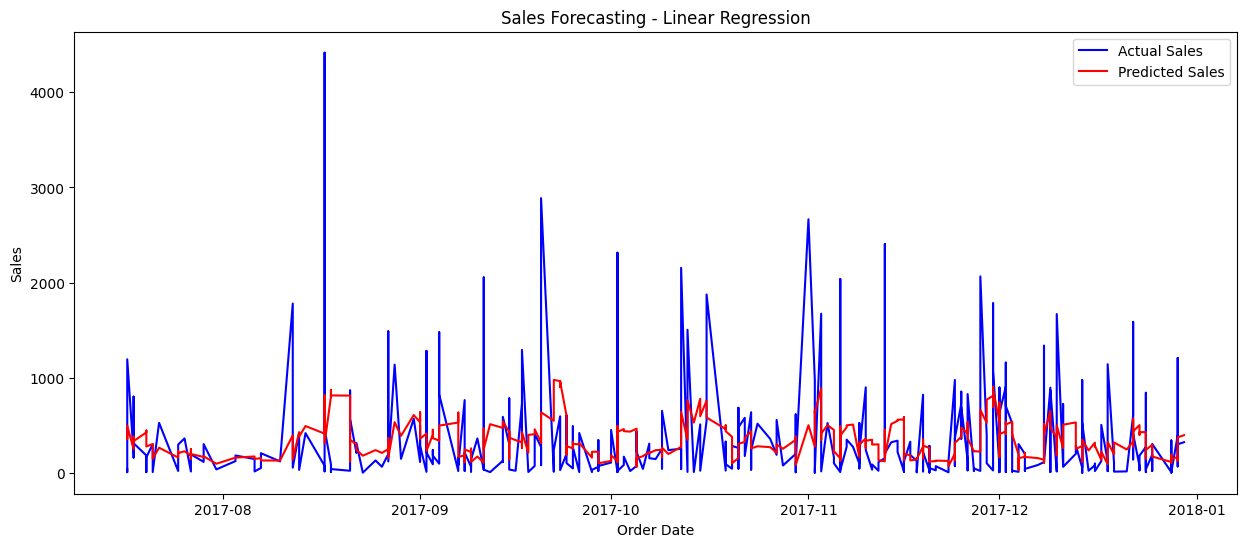

In [32]:
plt.figure(figsize=(15,6))
plt.plot(df['Order Date'][train_size:], y_test, label="Actual Sales", color="blue")
plt.plot(df['Order Date'][train_size:], y_pred, label="Predicted Sales", color="red")
plt.title("Sales Forecasting - Linear Regression")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
# Observation – Time Series Analysis
# The model was trained using lag features (Lag-1, Lag-7) and a 7-day rolling mean to capture both short-term and weekly patterns.
# The predicted sales (red line) follow the overall trend of actual sales (blue line), but sharp peaks and sudden fluctuations are not captured well.
# The Mean Absolute Error (MAE) of ~292 means that, on average, the model’s predictions are off by about 292 sales units compared to actual values.
# The model performs better in stable periods, while it struggles with extreme spikes in sales, which is expected for simple linear regression.

In [ ]:
# Conclusion
# The forecasting model captures the general sales trend and seasonality but cannot fully adapt to sudden demand spikes.
# With MAE ~292, the model is reasonably accurate for short-term forecasting in a hackathon scenario.
# For better real-world accuracy, advanced models like ARIMA, Prophet, or LSTM could be explored, but Linear Regression is a good fast and explainable baseline.

In [33]:
###  Save Model

In [35]:
os.makedirs("../models/saved_models", exist_ok=True)
joblib.dump(model, "../models/saved_models/sales_model.pkl")
print("Sales Forecasting Model saved at ../models/saved_models/sales_model.pkl")

Sales Forecasting Model saved at ../models/saved_models/sales_model.pkl
